# 분류

## 데이터 준비

인식에 사용할 데이터 다운로드.

In [0]:
!rm -rf imagenet
!mkdir imagenet

# 버섯
!wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
!wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
!wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
# 강아지
!wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
!wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
!wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
# 고양이  
!wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
!wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
!wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg
  

--2019-07-24 11:38:07--  http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 13.249.137.165, 2600:9000:212f:8e00:0:5a51:64c9:c681, 2600:9000:212f:e400:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|13.249.137.165|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg [following]
--2019-07-24 11:38:07--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|13.249.137.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  60.48K  --.-KB/s    in 0.01s   

2019-07-24 11:38:07 (3.98 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61927]

--2019-07-24 11:38:08--  http://farm3.static.flickr.

## 예측 위한 함수 선언

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def predict_vgg16(model, filename) :

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)
  
  # 화면에 이미지 보여주기
  plt.imshow(image.astype(int))
  plt.show()

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 가로
  # 세번째 224 : 세로
  # 네번째 3 : R, G, B 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))    

   

## 분류 실행

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

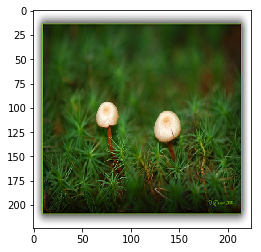

acorn (33.85%)


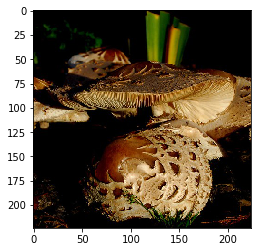

mushroom (71.36%)


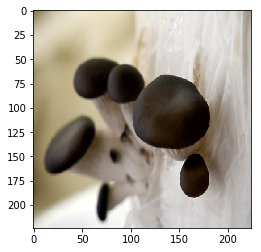

birdhouse (23.66%)


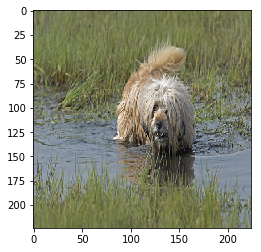

Tibetan_terrier (81.25%)


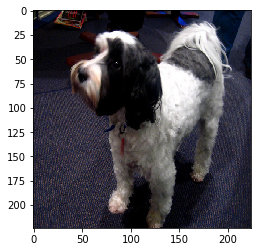

Tibetan_terrier (86.20%)


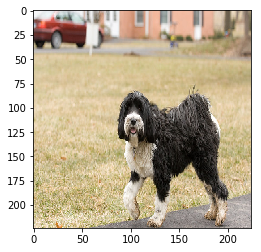

standard_poodle (23.32%)


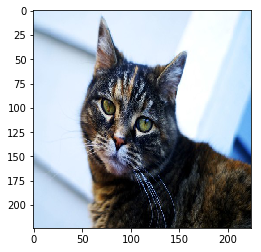

tabby (56.47%)


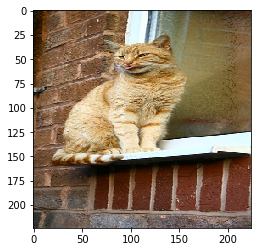

tiger_cat (39.95%)


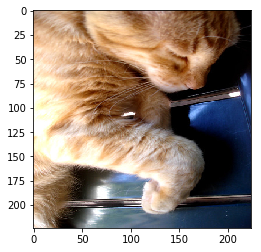

tiger_cat (18.94%)


In [0]:
from keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

# 테스트 할 이미지 파일들
files = [
      'imagenet/mushroom1.jpg',
      'imagenet/mushroom2.jpg',
      'imagenet/mushroom3.jpg',
      'imagenet/dog1.jpg',
      'imagenet/dog2.jpg',
      'imagenet/dog3.jpg',
      'imagenet/cat1.jpg',
      'imagenet/cat2.jpg',
      'imagenet/cat3.jpg',
    ]

# 분류 실행
for file in files :
  predict_vgg16(model, file)  

# 커스텀 데이터 학습 - train_x, train_y에 의한

다음에서 다운받은 데이터의 일부

http://vision.stanford.edu/aditya86/ImageNetDogs

<br>

데이터는 다음과 같이 구성됨

```
dogs/
    class1/
        file1.jpg
        file2.jpg
         ...
    class2/ 
        file21.jpg
        file22.jpg
         ...    
    class3/
        file31.jpg
        file32.jpg
         ...
    ...

```

## 커스텀 데이터 다운로드

dogs.tar.gz

In [0]:
!rm -rf dogs.tar.gz
!wget https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
!ls -al  

--2019-07-24 11:49:49--  https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz [following]
--2019-07-24 11:49:49--  https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

dogs.tar.gz         1

In [0]:
!rm -rf dogs
!tar xvfz dogs.tar.gz
!ls -al dogs

dogs/
dogs/n02085620-Chihuahua/
dogs/n02085782-Japanese_spaniel/
dogs/n02085936-Maltese_dog/
dogs/n02086079-Pekinese/
dogs/n02086240-Shih-Tzu/
dogs/n02086646-Blenheim_spaniel/
dogs/n02086910-papillon/
dogs/n02087046-toy_terrier/
dogs/n02087394-Rhodesian_ridgeback/
dogs/n02088094-Afghan_hound/
dogs/n02088094-Afghan_hound/n02088094_1003.jpg
dogs/n02088094-Afghan_hound/n02088094_1007.jpg
dogs/n02088094-Afghan_hound/n02088094_1023.jpg
dogs/n02088094-Afghan_hound/n02088094_10263.jpg
dogs/n02088094-Afghan_hound/n02088094_10715.jpg
dogs/n02088094-Afghan_hound/n02088094_10822.jpg
dogs/n02088094-Afghan_hound/n02088094_10832.jpg
dogs/n02088094-Afghan_hound/n02088094_10982.jpg
dogs/n02088094-Afghan_hound/n02088094_11006.jpg
dogs/n02088094-Afghan_hound/n02088094_11172.jpg
dogs/n02088094-Afghan_hound/n02088094_11182.jpg
dogs/n02088094-Afghan_hound/n02088094_1126.jpg
dogs/n02088094-Afghan_hound/n02088094_1128.jpg
dogs/n02088094-Afghan_hound/n02088094_11432.jpg
dogs/n02088094-Afghan_hound/n02088094_1

## 데이터 로딩 함수 정의

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16

In [0]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)

#   x = x/255
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels



In [0]:
(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(custom_labels)  


(1535, 224, 224, 3)
(1535,)
(384, 224, 224, 3)
(384,)
['n02085620-Chihuahua' 'n02085782-Japanese_spaniel'
 'n02085936-Maltese_dog' 'n02086079-Pekinese' 'n02086240-Shih-Tzu'
 'n02086646-Blenheim_spaniel' 'n02086910-papillon' 'n02087046-toy_terrier'
 'n02087394-Rhodesian_ridgeback' 'n02088094-Afghan_hound']


(1535, 224, 224, 3)


## 기존에 있던 학습된 모델 파일 삭제

In [0]:
vgg16_model_path = 'new_trained_from_vgg16.h5'
!rm -rf {vgg16_model_path}

## 모델 구조 정의

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

from keras.applications import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델
model.summary()

model.save(vgg16_model_path)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from keras.models import load_model

model = load_model(vgg16_model_path)

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="RMSprop",
              metrics=['acc'])

# 모델 학습
model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)

model.save(vgg16_model_path)


Epoch 1/10
1535/1535 [==============================] - 9s 6ms/step - loss: 9.4850 - acc: 0.4098
Epoch 2/10
1535/1535 [==============================] - 8s 5ms/step - loss: 8.2475 - acc: 0.4847
Epoch 3/10
1535/1535 [==============================] - 8s 5ms/step - loss: 7.0792 - acc: 0.5570
Epoch 4/10
1535/1535 [==============================] - 8s 5ms/step - loss: 6.9550 - acc: 0.5668
Epoch 5/10
1535/1535 [==============================] - 8s 5ms/step - loss: 6.9925 - acc: 0.5648
Epoch 6/10
1535/1535 [==============================] - 8s 5ms/step - loss: 7.0058 - acc: 0.5648
Epoch 7/10
1535/1535 [==============================] - 8s 5ms/step - loss: 6.9449 - acc: 0.5674
Epoch 8/10
1535/1535 [==============================] - 8s 5ms/step - loss: 6.9149 - acc: 0.5700
Epoch 9/10
1535/1535 [==============================] - 8s 6ms/step - loss: 6.7872 - acc: 0.5779
Epoch 10/10
1535/1535 [==============================] - 9s 6ms/step - loss: 6.7428 - acc: 0.5798


## 결과 확인

384/384 [==============================] - 2s 5ms/step
loss = 16.118096033732098
acc = 0.0
9 n02088094-Afghan_hound
4 n02086240-Shih-Tzu


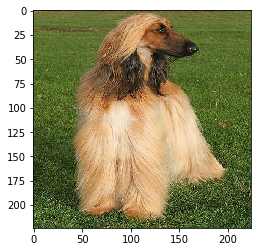

1 n02085782-Japanese_spaniel
6 n02086910-papillon


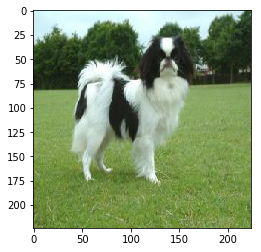

1 n02085782-Japanese_spaniel
5 n02086646-Blenheim_spaniel


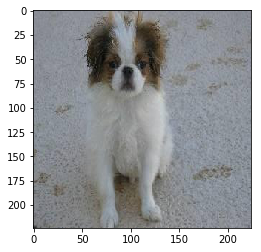

1 n02085782-Japanese_spaniel
4 n02086240-Shih-Tzu


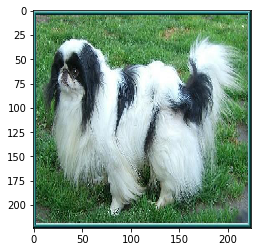

1 n02085782-Japanese_spaniel
4 n02086240-Shih-Tzu


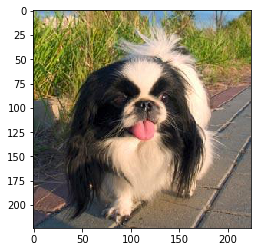

In [0]:
import matplotlib.pyplot as plt

loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)

predicted = np.argmax(y_, axis=1)


# train_x, test_x는 vgg16.prerprocess_input()에 의해 변형되었다.
(_, _), (raw_test_x, _), custom_labels = load_custom_data("dogs")


for i in [0,50,100,150,200]:  
  print(test_y[i], custom_labels[test_y[i]])
  print(predicted[i], custom_labels[predicted[i]])
  plt.imshow(raw_test_x[i].astype(int))
  plt.show()


# VGG16 커스텀 학습 최소 코드

In [0]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

In [0]:
import os

import matplotlib.pyplot as plt
import numpy as np

from keras import optimizers
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from keras.applications import vgg16
from keras.applications import VGG16

conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)


model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])




Epoch 1/10
1535/1535 [==============================] - 11s 7ms/step - loss: 12.4476 - acc: 0.2228
Epoch 2/10
1535/1535 [==============================] - 9s 6ms/step - loss: 11.9550 - acc: 0.2567
Epoch 3/10
1535/1535 [==============================] - 9s 6ms/step - loss: 10.9103 - acc: 0.3218
Epoch 4/10
1535/1535 [==============================] - 9s 6ms/step - loss: 10.6659 - acc: 0.3375
Epoch 5/10
1535/1535 [==============================] - 9s 6ms/step - loss: 10.6976 - acc: 0.3362
Epoch 6/10
1535/1535 [==============================] - 9s 6ms/step - loss: 10.2698 - acc: 0.3616
Epoch 7/10
1535/1535 [==============================] - 9s 6ms/step - loss: 10.2899 - acc: 0.3603
Epoch 8/10
1535/1535 [==============================] - 9s 6ms/step - loss: 10.0299 - acc: 0.3765
Epoch 9/10
1535/1535 [==============================] - 9s 6ms/step - loss: 10.8804 - acc: 0.3231
Epoch 10/10
384/384 [==============================] - 3s 7ms/step
loss = 15.06874030828476
acc = 0.06510416666666667

# 커스텀 데이터 학습 - train_x, train_y에 데이터 증강

In [0]:
import os

import matplotlib.pyplot as plt
import numpy as np

from keras import optimizers
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from keras.applications import VGG16



conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)
# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit_generator(
    data_aug_generator.flow(train_x, train_y, batch_size=64),
    steps_per_epoch=train_x.shape[0]/64, # data_size / batch_size
    epochs=10)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


Epoch 1/10
24/23 [==============================] - 14s 592ms/step - loss: 13.3294 - acc: 0.1687
Epoch 2/10
24/23 [==============================] - 13s 557ms/step - loss: 12.2101 - acc: 0.2410
Epoch 3/10
24/23 [==============================] - 13s 542ms/step - loss: 12.0914 - acc: 0.2488
Epoch 4/10
24/23 [==============================] - 13s 561ms/step - loss: 12.2463 - acc: 0.2384
Epoch 5/10
24/23 [==============================] - 13s 547ms/step - loss: 11.4607 - acc: 0.2873
Epoch 6/10
24/23 [==============================] - 13s 561ms/step - loss: 11.1820 - acc: 0.3055
Epoch 7/10
24/23 [==============================] - 13s 557ms/step - loss: 10.7233 - acc: 0.3336
Epoch 8/10
24/23 [==============================] - 13s 556ms/step - loss: 10.7492 - acc: 0.3310
Epoch 9/10
24/23 [==============================] - 13s 551ms/step - loss: 10.4311 - acc: 0.3511
Epoch 10/10
384/384 [==============================] - 3s 7ms/step
loss = 15.068740288416544
acc = 0.06510416666666667
9 n02088

# 커스텀 데이터 학습 - 디렉토리 구조를 사용한


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
        ...
    
```

## 커스텀 데이터 다운로드

In [0]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs_prepared.tar.gz
!ls -al  

--2019-07-24 13:06:15--  https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs_prepared.tar.gz [following]
--2019-07-24 13:06:15--  https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_pre

In [0]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

## 디렉토리로 준비된 데이터로 커스텀 학습

In [0]:
import os

import matplotlib.pyplot as plt
import numpy as np

from keras import optimizers
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from keras.applications import vgg16
from keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


# (train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
# test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)
# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/64, # data_size / batch_size    
      epochs=10
)


# y_ = model.predict(test_x)
y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.


W0724 13:34:57.333662 140597917988736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
24/23 [==============================] - 26s 1s/step - loss: 13.4346 - acc: 0.1629 - val_loss: 12.4765 - val_acc: 0.2250
Epoch 2/10
24/23 [==============================] - 11s 470ms/step - loss: 12.6740 - acc: 0.2136 - val_loss: 12.3908 - val_acc: 0.2313
Epoch 3/10
24/23 [==============================] - 18s 770ms/step - loss: 12.1953 - acc: 0.2424 - val_loss: 11.9665 - val_acc: 0.2576
Epoch 4/10
24/23 [==============================] - 17s 718ms/step - loss: 12.2777 - acc: 0.2380 - val_loss: 11.9878 - val_acc: 0.2562
Epoch 5/10
24/23 [==============================] - 18s 748ms/step - loss: 12.1521 - acc: 0.2461 - val_loss: 12.3908 - val_acc: 0.2313
Epoch 6/10
24/23 [==============================] - 18s 731ms/step - loss: 12.0140 - acc: 0.2533 - val_loss: 11.5066 - val_acc: 0.2803
Epoch 7/10
24/23 [==============================] - 18s 733ms/step - loss: 12.7825 - acc: 0.2047 - val_loss: 14.4056 - val_acc: 0.1062
Epoch 8/10
24/23 [==============================] - 18s 73

# 디렉토리 구조의 데이터의 학습 최소 코드

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import vgg16

import matplotlib.pyplot as plt
import numpy as np


from keras.applications import VGG16
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/64, # data_size / batch_size    
      epochs=10
)


y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])
